In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
ibm_df=data=pd.read_csv('ibm-common-stock-closing-prices.csv')
ibm_df.index=ibm_df['Date']

In [8]:
print('Shape of dataframe:', df.shape)

Shape of dataframe: (1009, 2)


In [11]:
ibm_df.head(10)

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50
5,1962-01-09,556.00
6,1962-01-10,557.00
7,1962-01-11,563.00
8,1962-01-12,564.00
9,1962-01-15,566.50


In [18]:
#Rename the second column

ibm_df.rename(columns={'IBM common stock closing prices':'Close_Price'},inplace=True)
ibm_df.head()

,Date,Close_Price
Date,,
1962-01-02,1962-01-02,572.00
1962-01-03,1962-01-03,577.00
1962-01-04,1962-01-04,571.25
1962-01-05,1962-01-05,560.00
1962-01-08,1962-01-08,549.50


In [22]:
#remove missing values

missing=(pd.isnull(ibm_df['Date']))&(pd.isnull(ibm_df['Close_Price']))
print('No. of rows with missing values:',missing.sum())
ibm_df=ibm_df.loc[~missing,:]

No. of rows with missing values: 0


In [32]:
#To illustrate the idea of average we compute aweekly moving average taking
#a window of 5 days instead of 7 days bcoz trading happens only during the weekdays

ibm_df['5-Day Moving Avg']=ibm_df['Close_Price'].rolling(5).mean()
ibm_df

,Date,Close_Price,5-Day Moving Avg
Date,,,
1962-01-02,1962-01-02,572.00,NaN
1962-01-03,1962-01-03,577.00,NaN
1962-01-04,1962-01-04,571.25,NaN
1962-01-05,1962-01-05,560.00,NaN
1962-01-08,1962-01-08,549.50,565.95
...,...,...,...
1965-12-28,1965-12-28,502.25,502.75
1965-12-29,1965-12-29,498.00,501.00
1965-12-30,1965-12-30,500.00,499.85


In [30]:
ibm_df['Close_Price']

Date
1962-01-02                         572.00
1962-01-03                         577.00
1962-01-04                         571.25
1962-01-05                         560.00
1962-01-08                         549.50
                                    ...  
1965-12-28                         502.25
1965-12-29                         498.00
1965-12-30                         500.00
1965-12-31                         499.00
IBM common stock closing prices       NaN
Name: Close_Price, Length: 1009, dtype: float64

In [31]:
ibm_df['Close_Price'].mean()

462.81768849206367

In [28]:
ibm_df['Close_Price'].rolling(5).mean()

Date
1962-01-02                            NaN
1962-01-03                            NaN
1962-01-04                            NaN
1962-01-05                            NaN
1962-01-08                         565.95
                                    ...  
1965-12-28                         502.75
1965-12-29                         501.00
1965-12-30                         499.85
1965-12-31                         499.85
IBM common stock closing prices       NaN
Name: Close_Price, Length: 1009, dtype: float64

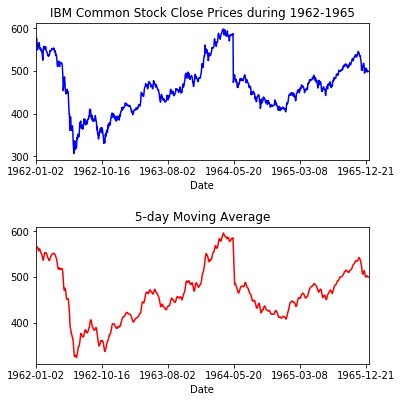

In [36]:
fig=plt.figure(figsize=(5.5,5.5))
ax=fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax,color='b')
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax=fig.add_subplot(2,1,2)
ibm_df['5-Day Moving Avg'].plot(ax=ax,color='r')
ax.set_title('5-day Moving Average')
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=2.0)

In [40]:
# Calculate the moving averagesnusing 'rolling' and 'mean' functions

MA2=ibm_df['Close_Price'].rolling(window=2).mean()
TwoXMA2=MA2.rolling(window=2).mean()
MA2

Date
1962-01-02                             NaN
1962-01-03                         574.500
1962-01-04                         574.125
1962-01-05                         565.625
1962-01-08                         554.750
                                    ...   
1965-12-28                         501.125
1965-12-29                         500.125
1965-12-30                         499.000
1965-12-31                         499.500
IBM common stock closing prices        NaN
Name: Close_Price, Length: 1009, dtype: float64

In [42]:
MA4=ibm_df['Close_Price'].rolling(window=4).mean()
TwoXMA4=MA4.rolling(window=2).mean()
MA4

Date
1962-01-02                              NaN
1962-01-03                              NaN
1962-01-04                              NaN
1962-01-05                         570.0625
1962-01-08                         564.4375
                                     ...   
1965-12-28                         501.7500
1965-12-29                         499.8125
1965-12-30                         500.0625
1965-12-31                         499.8125
IBM common stock closing prices         NaN
Name: Close_Price, Length: 1009, dtype: float64

In [47]:
MA3=ibm_df['Close_Price'].rolling(window=3).mean()
ThreeXMA3=MA3.rolling(window=3).mean()
MA3

Date
1962-01-02                                NaN
1962-01-03                                NaN
1962-01-04                         573.416667
1962-01-05                         569.416667
1962-01-08                         560.250000
                                      ...    
1965-12-28                         500.416667
1965-12-29                         500.083333
1965-12-30                         500.083333
1965-12-31                         499.000000
IBM common stock closing prices           NaN
Name: Close_Price, Length: 1009, dtype: float64

In [50]:
#Lets remove NAn from the above variables

MA2=MA2.ix[~pd.isnull(MA2)]
TwoXMA2=TwoXMA2.ix[~pd.isnull(TwoXMA2)]
MA2

MA4=MA4.ix[~pd.isnull(MA4)]
TwoXMA4=TwoXMA4.ix[~pd.isnull(TwoXMA4)]
MA4

MA3=MA3.ix[~pd.isnull(MA3)]
ThreeXMA3=ThreeXMA3.ix[~pd.isnull(ThreeXMA3)]
MA3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-

Date
1962-01-04    573.416667
1962-01-05    569.416667
1962-01-08    560.250000
1962-01-09    555.166667
1962-01-10    554.166667
                 ...    
1965-12-27    501.583333
1965-12-28    500.416667
1965-12-29    500.083333
1965-12-30    500.083333
1965-12-31    499.000000
Name: Close_Price, Length: 1006, dtype: float64

Text(0.5, 1.0, '3 day MA and 3X3 day MA')

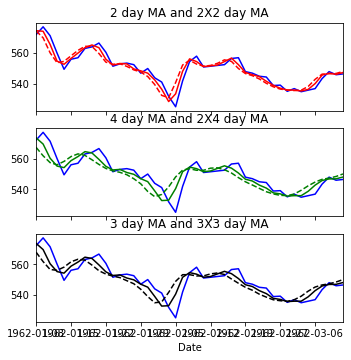

In [66]:
f,axarr=plt.subplots(3,sharex=True)
f.set_size_inches(5.5,5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b',linestyle='-',ax=axarr[0])
MA2.iloc[:45].plot(color='r',linestyle='-',ax=axarr[0])
TwoXMA2.iloc[:45].plot(color='r',linestyle='--',ax=axarr[0])
axarr[0].set_title('2 day MA and 2X2 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b',linestyle='-',ax=axarr[1])
MA3.iloc[:45].plot(color='g',linestyle='-',ax=axarr[1])
TwoXMA4.iloc[:45].plot(color='g',linestyle='--',ax=axarr[1])
axarr[1].set_title('4 day MA and 2X4 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b',linestyle='-',ax=axarr[2])
MA3.iloc[:45].plot(color='k',linestyle='-',ax=axarr[2])
ThreeXMA3.iloc[:45].plot(color='k',linestyle='--',ax=axarr[2])
axarr[2].set_title('3 day MA and 3X3 day MA')